In [1]:
pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.6 MB 1.3 MB/s eta 0:00:06
                                              0.1/7.6 MB 1.3 MB/s eta 0:00:06
     -                                        0.2/7.6 MB 1.3 MB/s eta 0:00:06
     -                                        0.3/7.6 MB 1.4 MB/s eta 0:00:06
     --                                       0.4/7.6 MB 1.4 MB/s eta 0:00:06
     --                                       0.5/7.6 MB 1.5 MB/s eta 0:00:05
     ---                                      0.6/7.6 MB 1.6 MB/s eta 0:00:05
     ---                                      0.6/7.6 MB 1.7 MB/s eta 0:00:05
     ---                                      0.7/7.6 MB 1.6 MB/s eta 0:00:05
     ----                                     0.9/7.6 MB 1.7 MB/s eta 0:00:04
     ----                                     0.9/7.6 MB 1.7 MB/s eta 0

In [2]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     ----                                    30.7/293.3 kB 1.3 MB/s eta 0:00:01
     ---------------                        122.9/293.3 kB 1.2 MB/s eta 0:00:01
     -------------------------------        245.8/293.3 kB 1.7 MB/s eta 0:00:01
     ----------------------------------     266.2/293.3 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "123",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [6]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1: Find the division wise total_sale_price joining fact table and respective dimension table

In [11]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM public.fact_table t " \
              "JOIN public.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [12]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [13]:
df_q1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [14]:
df_q1 =df_q1.drop(7)

In [15]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [16]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [17]:
changetype(df_q1)

In [18]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [19]:
df_q1=df_q1.set_index(['division'])
df_q1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

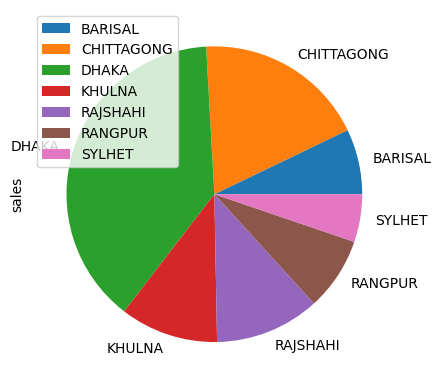

In [20]:
df_q1.plot.pie(y='sales')

<Axes: xlabel='division'>

<Figure size 1000x500 with 0 Axes>

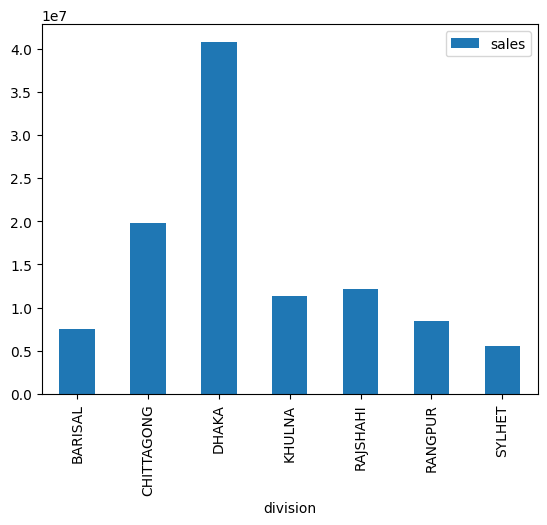

In [21]:
plt.figure(figsize=(10,5))
df_q1.plot.bar(y='sales')

In [25]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM public.fact_table t " \
              "JOIN public.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.district) " \
                "ORDER BY s.district "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [26]:
records

[('BAGERHAT', Decimal('1307651.00')),
 ('BANDARBAN', Decimal('995360.75')),
 ('BARGUNA', Decimal('869041.00')),
 ('BARISAL', Decimal('2897237.75')),
 ('BHOLA', Decimal('1012205.75')),
 ('BOGRA', Decimal('1716452.75')),
 ('BRAHMANBARIA', Decimal('1328234.25')),
 ('CHANDPUR', Decimal('1153276.75')),
 ('CHAPAI NABABGANJ', Decimal('739447.50')),
 ('CHITTAGONG', Decimal('7292985.50')),
 ('CHUADANGA', Decimal('563909.75')),
 ('COMILLA', Decimal('2286898.25')),
 ("COX'S BAZAR", Decimal('1188128.75')),
 ('DHAKA', Decimal('23597621.00')),
 ('DINAJPUR', Decimal('1871005.75')),
 ('FARIDPUR', Decimal('1287383.75')),
 ('FENI', Decimal('847873.50')),
 ('GAIBANDHA', Decimal('997077.75')),
 ('GAZIPUR', Decimal('722286.25')),
 ('GOPALGANJ', Decimal('731312.75')),
 ('HABIGANJ', Decimal('1153998.00')),
 ('JAMALPUR', Decimal('1009760.00')),
 ('JESSORE', Decimal('1132590.50')),
 ('JHALOKATI', Decimal('570807.25')),
 ('JHENAIDAH', Decimal('869991.25')),
 ('JOYPURHAT', Decimal('735378.50')),
 ('KHAGRACHHARI'

In [23]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM public.fact_table t " \
              "JOIN public.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [24]:
records

[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [27]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.month, SUM(t.total_price) " \
              "FROM public.fact_table t " \
              "JOIN public.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.month) " \
                "ORDER BY s.month "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [28]:
records

[(1, Decimal('9042244.00')),
 (2, Decimal('8073877.50')),
 (3, Decimal('8939152.00')),
 (4, Decimal('8504634.75')),
 (5, Decimal('9078002.50')),
 (6, Decimal('8556853.00')),
 (7, Decimal('9046580.00')),
 (8, Decimal('8929475.25')),
 (9, Decimal('8724326.50')),
 (10, Decimal('8902783.75')),
 (11, Decimal('8680026.00')),
 (12, Decimal('8923480.50')),
 (None, Decimal('105401435.75'))]

# Q2:  Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table

In [34]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.name, SUM(t.total_price) " \
              "FROM public.fact_table t " \
              "JOIN public.customer_dim s on s.customer_key=t.customer_key " \
                "GROUP BY CUBE(s.name) " \
                "ORDER BY s.name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [35]:
records

[('-', Decimal('20643.50')),
 ('aafreen fatima', Decimal('11174.75')),
 ('aafrin', Decimal('22136.75')),
 ('aafrin @ dolly', Decimal('23529.75')),
 ('aaftaab husan', Decimal('9682.00')),
 ('aakanksha', Decimal('11469.00')),
 ('aaliya', Decimal('21663.25')),
 ('aamina', Decimal('12649.25')),
 ('aamir', Decimal('10134.00')),
 ('aamir hussain', Decimal('10892.50')),
 ('aamod & pramod', Decimal('12280.25')),
 ('aamrin jahan', Decimal('11622.00')),
 ('aanamika misra', Decimal('8929.25')),
 ('aanchal', Decimal('35703.50')),
 ('aanik with her son', Decimal('8568.25')),
 ('aansi devi', Decimal('9909.00')),
 ('aanya @ china', Decimal('11443.50')),
 ('aaradhana @ priyanka', Decimal('11469.25')),
 ('aarifa bano', Decimal('11295.75')),
 ('aarifun bivi', Decimal('13139.25')),
 ('aarti', Decimal('661675.25')),
 ('aarti @ kajal', Decimal('12108.50')),
 ('aarti @ noni', Decimal('12335.50')),
 ('aarti bunkar', Decimal('13661.75')),
 ('aarti devi', Decimal('26537.00')),
 ('aarti diwakar', Decimal('10892

In [36]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.bank_name, SUM(t.total_price) " \
              "FROM public.fact_table t " \
              "JOIN public.trans_dim s on s.payment_key=t.payment_key " \
                "GROUP BY CUBE(s.bank_name) " \
                "ORDER BY s.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [37]:
records

[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [38]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.trans_type, SUM(t.total_price) " \
              "FROM public.fact_table t " \
              "JOIN public.trans_dim s on s.payment_key=t.payment_key " \
                "GROUP BY CUBE(s.trans_type) " \
                "ORDER BY s.trans_type "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [39]:
records

[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

# Q3: Total sales in Barisal

In [48]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) " \
              "FROM public.fact_table t " \
              "JOIN public.store_dim s on s.store_key=t.store_key " \
                "WHERE s.district= 'BARISAL'" \
               "GROUP BY CUBE(s.district) " \
                 
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [49]:
records

[('BARISAL', Decimal('2897237.75')), (None, Decimal('2897237.75'))]

# Q4: Total sales in 2015

In [53]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM public.fact_table t " \
              "JOIN public.time_dim s on s.time_key=t.time_key " \
               "WHERE s.year= '2015'" \
               "GROUP BY CUBE(s.year) " \
                 
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [54]:
records

[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

# Q5: Total sales of Barisal in 2015

In [56]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s2.district, s1.year, SUM(t.total_price) " \
              "FROM public.fact_table t " \
              "JOIN public.time_dim s1 on s1.time_key=t.time_key " \
              "JOIN public.store_dim s2 on s2.store_key=t.store_key " \
               "WHERE s1.year= '2015' and s2.district= 'BARISAL'" \
               "GROUP BY CUBE(s1.year, s2.district) " \
                 
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [57]:
records

[('BARISAL', 2015, Decimal('415748.75')),
 (None, 2015, Decimal('415748.75')),
 (None, None, Decimal('415748.75')),
 ('BARISAL', None, Decimal('415748.75'))]

# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [69]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s2.store_key, s1.item_name, SUM(t.quantity) " \
              "FROM public.fact_table t " \
              "JOIN public.item_dim s1 on s1.item_key=t.item_key " \
              "JOIN public.store_dim s2 on s2.store_key=t.store_key " \
               "GROUP BY CUBE(s1.item_name, s2.store_key) " \
               "ORDER BY s2.store_key, SUM(t.quantity) desc" \
                 
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [70]:
records

[('S0001', None, Decimal('8169')),
 ('S0001', 'Pepsi - 12 oz cans', Decimal('92')),
 ('S0001', 'Muscle Milk Protein Shake Van. 11oz', Decimal('90')),
 ('S0001', 'Hefty Supreme Foam Plates 6 inch', Decimal('78')),
 ('S0001', 'Waterloo Sparkling Lime 12oz', Decimal('70')),
 ('S0001', 'Njoy Sugar Canister 22 oz', Decimal('69')),
 ('S0001', 'Vita Coconut Water 10oz ', Decimal('68')),
 ('S0001', 'Muscle Milk Protein Shake Strbry. 11oz', Decimal('67')),
 ('S0001', 'Sprite - 12 oz cans', Decimal('64')),
 ('S0001', 'Cheez It White Cheddar 1.5 oz', Decimal('63')),
 ('S0001', 'Sargento Bal. Breaks (fruit, nut, cheese)', Decimal('62')),
 ('S0001', 'Dixie Perfecttouch Paper Cups 12oz', Decimal('61')),
 ('S0001', 'Hershey Chocoalte Minatures Assort.', Decimal('60')),
 ('S0001', 'A&W Root Beer - 12 oz cans', Decimal('60')),
 ('S0001', 'Dark Chocolate Mint Patties', Decimal('60')),
 ('S0001', 'Nature Valley Sweet/Salty Almond Bars      ', Decimal('59')),
 ('S0001', 'Large Trash Bags Black 33 gal', De

In [73]:
df_q6 = pd.DataFrame(records, columns=['Store_key', 'Item_name', "Quantity"])
df_q6

,Store_key,Item_name,Quantity
0,S0001,None,8169
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
4,S0001,Waterloo Sparkling Lime 12oz,70
...,...,...,...
188095,None,Dole Fruit in Gel Cups 4.3 oz,21818
188096,None,La Croix Sparkling Orange 12 oz,21817
188097,None,Hershey Factory Favorites Mix,21741
188098,None,Monster Java 15 oz,21698


In [78]:
df_q6= df_q6.dropna()
df_q6

,Store_key,Item_name,Quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
4,S0001,Waterloo Sparkling Lime 12oz,70
5,S0001,Njoy Sugar Canister 22 oz,69
...,...,...,...
187835,S0099,V-8 Splash Variety 20 oz,5
187836,S0099,Fuze Iced Tea,4
187837,S0099,Paper Plates 8.5 inch Ultra Strong,4
187838,S0099,Pringles Snak Stacks Variety,3


In [81]:
top3= df_q6.groupby('Store_key').head(3)
top3= top3.head(30)
top3

,Store_key,Item_name,Quantity
1,S0001,Pepsi - 12 oz cans,92
2,S0001,Muscle Milk Protein Shake Van. 11oz,90
3,S0001,Hefty Supreme Foam Plates 6 inch,78
259,S0002,Planters Nut-trition 1.5 oz,83
260,S0002,Altoids Small Packs Variety,80
261,S0002,AquaFina Purified Drinking Water 16oz,78
518,S0003,Sprite - 12 oz cans,122
519,S0003,Diet Coke - 12 oz cans,109
520,S0003,Muscle Milk Protein Shake Van. 11oz,76
777,S0004,Kind Bars Variety Pack 1.4 oz,79


# Q7: What products have been sold through card or mobile since X days?

In [103]:
con = PostgresConnection().getConnection()
cur = con.cursor()
days= int(input('Enter number of Days: '))
select_stmt = "SELECT s1.item_name " \
              "FROM public.fact_table t " \
              "JOIN public.item_dim s1 on s1.item_key=t.item_key " \
              "JOIN public.time_dim s2 on s2.time_key=t.time_key " \
              "JOIN public.trans_dim s3 on s3.payment_key=t.payment_key " \
               "Where s2.day between 1 and 5"

                 
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [104]:
records

[('Paper Bowls 20 oz Ultra Strong',),
 ('Flamin Hot Chip Mix 1oz',),
 ('La Croix Sparkling Pure 12 oz',),
 ('Foam Coffee Cups - 08 ounce',),
 ('Kleenex Tissue Square Boxes 75/box',),
 ('Blue Diamond Almonds Rstd, Sltd',),
 ('Pure White Sugar Packets',),
 ('Coke Zero Sugar 12 oz cans',),
 ('Hand Sanitizer Refill Pump',),
 ('Kellogg Fun Mix Cheez it, Prngls, Fam Amos',),
 ('Dunkin Donuts Original Blend',),
 ("Kellogg's Cereals Assortment Pack ",),
 ('Chewy Granola Variety Bars Quaker',),
 ('Fresca Black Cherry - 12 oz cans',),
 ('Waterloo Sparkling Blackcherry 12oz',),
 ('Coke Classic 12 oz cans',),
 ('Yoplait Original Yogurt Variety Pack ',),
 ('Paper Plate 10 inch Ultra Strong',),
 ('Waterloo Sparkling Mango 12oz',),
 ('Altoids Small Packs Variety',),
 ('Paper Plate 10 inch Ultra Strong',),
 ('Chewy Granola Variety Bars Quaker',),
 ('Clorox Disinfecting Wipes ',),
 ('Sargento String Cheese 0.75oz',),
 ('Keebler Cookie & Cracker Variety',),
 ('Peppermints Hard Candy',),
 ('Pop-Tarts, Br